# 04 Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
accidents_with_speeds_df = pd.read_csv("../data/accidents_with_speeds_agg.csv", index_col="Unnamed: 0")
accidents_with_temps_df = pd.read_csv("../data/traffic_temperature_agg.csv", index_col="Unnamed: 0")

In [8]:
display(accidents_with_speeds_df.head())
display(accidents_with_temps_df.head())

,date,speed_limit,count
0,2018-07-05,40.0,1
1,2018-07-05,50.0,9
2,2018-07-05,70.0,3
3,2018-07-05,80.0,2
4,2018-07-05,100.0,2


,date,incident_info,mean_temperature,min_temperature,max_temperature,total_precipitation,snow_on_ground
0,2018-07-05,18,17.0,8.3,25.6,0.0,0.0
1,2018-07-06,18,22.5,12.1,32.9,0.2,0.0
2,2018-07-07,11,17.7,10.7,24.6,0.0,0.0
3,2018-07-08,7,15.2,6.2,24.2,0.0,0.0
4,2018-07-09,21,18.3,9.0,27.7,0.0,0.0


In [9]:
accidents_with_temps_df = accidents_with_temps_df.drop(columns=['incident_info'])

In [14]:
complete_df = pd.merge(accidents_with_speeds_df, accidents_with_temps_df, on='date', how='left')
complete_df.head()

,date,speed_limit,count,mean_temperature,min_temperature,max_temperature,total_precipitation,snow_on_ground
0,2018-07-05,40.0,1,17.0,8.3,25.6,0.0,0.0
1,2018-07-05,50.0,9,17.0,8.3,25.6,0.0,0.0
2,2018-07-05,70.0,3,17.0,8.3,25.6,0.0,0.0
3,2018-07-05,80.0,2,17.0,8.3,25.6,0.0,0.0
4,2018-07-05,100.0,2,17.0,8.3,25.6,0.0,0.0


In [21]:
complete_df['snow_on_ground'].corr(complete_df['count'])

0.09493145045335363

In [42]:
# Correlation matrix
corr_matrix = complete_df.corr()
corr_matrix

,speed_limit,count,mean_temperature,min_temperature,max_temperature,total_precipitation,snow_on_ground
speed_limit,1.000000,-0.292269,-0.008333,-0.008701,-0.007726,0.002409,0.008255
count,-0.292269,1.000000,-0.106117,-0.104125,-0.103989,0.035433,0.094931
mean_temperature,-0.008333,-0.106117,1.000000,0.977341,0.983607,0.075213,-0.598842
min_temperature,-0.008701,-0.104125,0.977341,1.000000,0.923170,0.134191,-0.589091
max_temperature,-0.007726,-0.103989,0.983607,0.923170,1.000000,0.022293,-0.585672
total_precipitation,0.002409,0.035433,0.075213,0.134191,0.022293,1.000000,-0.052653
snow_on_ground,0.008255,0.094931,-0.598842,-0.589091,-0.585672,-0.052653,1.000000


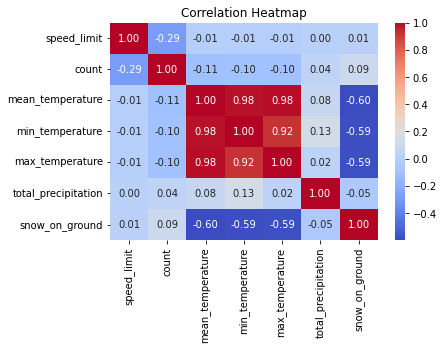

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


<br><br><br><br><br><br>

In [36]:
complete_df['date'] = pd.to_datetime(complete_df['date'])

In [38]:
oct_nov_dec_df = complete_df[
    complete_df['date'].dt.month.isin([10, 11, 12])
]


In [39]:
corr_matrix = oct_nov_dec_df.corr()

In [41]:
corr_matrix

,speed_limit,count,mean_temperature,min_temperature,max_temperature,total_precipitation,snow_on_ground
speed_limit,1.000000,-0.286325,-0.004957,-0.005877,-0.003853,0.002517,0.002614
count,-0.286325,1.000000,-0.155200,-0.155033,-0.145481,0.113608,0.068053
mean_temperature,-0.004957,-0.155200,1.000000,0.957285,0.971721,-0.072489,-0.526534
min_temperature,-0.005877,-0.155033,0.957285,1.000000,0.861970,0.007779,-0.509364
max_temperature,-0.003853,-0.145481,0.971721,0.861970,1.000000,-0.133793,-0.507570
total_precipitation,0.002517,0.113608,-0.072489,0.007779,-0.133793,1.000000,0.049256
snow_on_ground,0.002614,0.068053,-0.526534,-0.509364,-0.507570,0.049256,1.000000


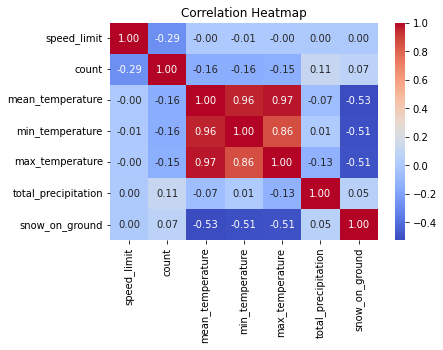

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
